In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchviz import make_dot

In [2]:
X = torch.tensor([[0.0], [1.0]])    # Input (lightness)
y = torch.tensor([[0.0], [1.0]])    # Output (dark/light)

In [3]:
class SimpleNeuron(nn.Module):
    def __init__(self):
        super(SimpleNeuron, self).__init__()
        self.weight = nn.Parameter(torch.randn(1, 1))  # Single weight
        self.bias = nn.Parameter(torch.randn(1))  # Single bias

    def forward(self, x):
        return torch.sigmoid(torch.matmul(x, self.weight) + self.bias)

In [4]:
model = SimpleNeuron()
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [5]:
for epoch in range(1000):
    # Forward pass
    outputs = model(X)
    loss = loss_fn(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss = {loss.item()}')

Epoch 0: Loss = 0.521355926990509
Epoch 100: Loss = 0.2939359247684479
Epoch 200: Loss = 0.20132438838481903
Epoch 300: Loss = 0.1505582183599472
Epoch 400: Loss = 0.11924690008163452
Epoch 500: Loss = 0.0982692539691925
Epoch 600: Loss = 0.08334070444107056
Epoch 700: Loss = 0.07222338765859604
Epoch 800: Loss = 0.06364774703979492
Epoch 900: Loss = 0.05684507638216019


In [6]:
test_input = torch.tensor([[0.5]])
print(f'Test output (lightness 0.5): {model(test_input).item()}')

Test output (lightness 0.5): 0.5536714196205139


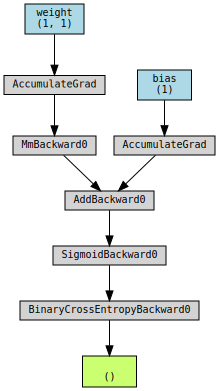

In [7]:
make_dot(loss, params=dict(model.named_parameters()))